<a href="https://colab.research.google.com/github/frankthairu/Moringa-School-IP-WEEK-4/blob/main/Francis_Thairu__Moringa_School_Week_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MORINGA PREP IP:WEEK 4
In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

Research Question

1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

2. What is the most popular hour for returning cars?

3. What station is the most popular?
   
   3.1 Overall?

   3.2 At the most popular picking hour?

4. What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
   
   4.1 Overall?

   4.2 At the most popular picking hour?

5. Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 


In [ ]:
# Importing the pandas library
import pandas as pd

# Importing the numpy library
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

#Reading the Dataset from our CSV file

The dataset we will use contains data collected for a period of 9 days.The dataset may take a bit of some time to load [~ 10 minutes]. 



Dataset link for download or access: 
1. http://bit.ly/autolib_dataset (Links to an external site.)
2. [Link] (Links to an external site.)

In [ ]:
#We read the data from the CSV file and create the dataframe to be used
# 
df = pd.read_csv('http://bit.ly/autolib_dataset',delimiter =',')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


# Previewing our Dataset and accesing info on our dataset


In [ ]:
#We preview the first 10 rows of our dataset

df.head(20)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [ ]:
#getting info about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
df.shape

(5000, 25)

# Cleaning our Dataframe

In [ ]:
#we first check for null values and calculate them
df.isna().sum().sum()

9842

In [ ]:
#we replace our null values with 0
df1 = df.fillna(0)
df1

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,0,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,0,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,0,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,0,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,0,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,0,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,0,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,0,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,0,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,0,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,0,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,0,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,0,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,0,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,0,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,0,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,0,3,station,ok,nonexistent,2018,4,4,17,27


In [ ]:
#we check if there are null values in our updated table
df1.isna().sum().sum()

0

In [ ]:
#we also check for any duplicates
df1.duplicated().any()

False

In [ ]:
#We use the quartile method to detect outliers

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df2 = df1[~((df1 < (Q1 - 1.5 * IQR))| (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

print("old shape:","\n", df1.shape)
print("****"* 10)
print("new shape:","\n", df2.shape)

old shape: 
 (5000, 25)
****************************************
new shape: 
 (3317, 25)


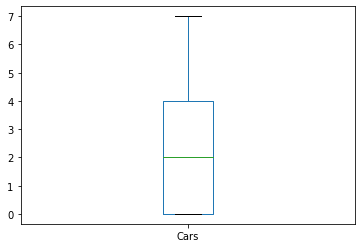

In [ ]:

import matplotlib.pyplot as plt 
% matplotlib inline 
df2.boxplot(column =['Cars'], grid = False) 

In [ ]:
#We drop some columns from our dataset that are not relevant

df2.drop(columns=["Displayed comment", "Geo point", "ID", "Status", "Charging Status", "Charge Slots", "Subscription status" ], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#We check if the columns were dropped

df2.head(2)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24


#Exporting the Cleaned Dataset

In [ ]:
# We then export our dataframe into a csv file using daframe.to_csv('example.csv')
# In the above case daframe is the dataframe which would like to export.
# we use the to_csv function to create a csv file with the name example 
# and export it.

df2.to_csv("New_car_data.csv")

In [ ]:
#We then read our new clean table from the csv file and preview the first 2 rows

df = pd.read_csv("New_car_data.csv")
df.head(2)

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
0,0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24


# Data Analysis and answering given Questions
1. Using blue car


In [ ]:
#we identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
#we break our operation in different steps
dfparis = df[(df['City'] == 'Paris') & (df['month'] >= 4) & (df['year'] == 2018)]
dfparis

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
0,0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24
2,4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17,23
3,5,8 Boulevard Voltaire,0,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,4,station,2018,4,6,7,2
4,6,37 rue Leblanc,0,0,0,0,Paris,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,4982,62 Avenue Parmentier,4,4,0,0,Paris,STATION,75011,Paris/Parmentier/62,operational,0,station,2018,4,5,23,30
3305,4983,4 avenue de la SÅur Rosalie,1,1,0,0,Paris,STATION,75013,Paris/SÅur Rosalie/4,operational,2,station,2018,4,6,9,14
3310,4990,47 boulevard de l'HÃ´pital,0,0,0,0,Paris,STATION,75013,Paris/HÃ´pital/47,operational,4,station,2018,4,3,21,13
3313,4994,15 rue de Rocroy,0,0,0,0,Paris,STATION,75010,Paris/Rocroy/15,operational,1,station,2018,4,1,20,49


In [ ]:
dfparis1 = dfparis[['Bluecar counter', 'hour']]
dfparis1

,Bluecar counter,hour
0,0,11
1,6,7
2,3,17
3,0,7
4,0,18
...,...,...
3304,4,23
3305,1,9
3310,0,21
3313,0,20


In [ ]:
dfparis1.sort_values(by = 'hour', ascending = False)[:1]

,Bluecar counter,hour
882,4,23


In [ ]:
#we find the most popular hour for returning cars

pop=df[['Bluecar counter', 'hour', 'Station type', 'Public name', 'Postal code']]
pop

pophour= pop.sort_values(by = 'hour', ascending = False)[:1]
pophour

,Bluecar counter,hour,Station type,Public name,Postal code
2946,0,23,station,Paris/Montmartre/31,75009


In [ ]:
#we find the station that is most popular in general

df.sort_values(by = 'Public name', ascending = False)[:1]


,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
1488,2250,53 Boulevard Foch,3,3,0,0,Ãpinay-sur-Seine,STATION,93800,Ãpinay-sur-Seine/Foch/53,operational,1,station,2018,4,4,8,13


In [ ]:
#we find the station that is most popular in most popular hour

pophour.sort_values(by = 'Public name')

,hour,Station type,Public name
2946,23,station,Paris/Montmartre/31


In [107]:
#we get the postal code that is most popular for picking up blue cars

df.pivot_table(values='Bluecar counter',index=['Postal code','Public name'],aggfunc=np.sum).sort_values(by='Bluecar counter',ascending=False).head(1)

,,Bluecar counter
Postal code,Public name,
92260,Fontenay-aux-Roses/Robert Marchand/32,50


In [ ]:
#we get the postal code that is most popular for picking up blue cars on most popular pickig hour

pophour.sort_values(by = 'Postal code')

,hour,Station type,Public name,Postal code
2946,23,station,Paris/Montmartre/31,75009



2. Using Utilib counter

In [ ]:
#weIdentify the most popular hour of the day for picking up a shared electric car (Utilib counter) in the city of Paris over the month of April 2018
#we break our operation in different steps

dfparis2 = df[(df['City'] == 'Paris') & (df['month'] >= 4) & (df['year'] == 2018)]
dfparis2

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
0,0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24
2,4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17,23
3,5,8 Boulevard Voltaire,0,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,4,station,2018,4,6,7,2
4,6,37 rue Leblanc,0,0,0,0,Paris,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,4982,62 Avenue Parmentier,4,4,0,0,Paris,STATION,75011,Paris/Parmentier/62,operational,0,station,2018,4,5,23,30
3305,4983,4 avenue de la SÅur Rosalie,1,1,0,0,Paris,STATION,75013,Paris/SÅur Rosalie/4,operational,2,station,2018,4,6,9,14
3310,4990,47 boulevard de l'HÃ´pital,0,0,0,0,Paris,STATION,75013,Paris/HÃ´pital/47,operational,4,station,2018,4,3,21,13
3313,4994,15 rue de Rocroy,0,0,0,0,Paris,STATION,75010,Paris/Rocroy/15,operational,1,station,2018,4,1,20,49


In [ ]:
dfparis3 = dfparis[['Utilib counter', 'hour']]
dfparis3

,Utilib counter,hour
0,0,11
1,0,7
2,0,17
3,0,7
4,0,18
...,...,...
3304,0,23
3305,0,9
3310,0,21
3313,0,20


In [ ]:
dfparis3.sort_values(by = 'hour', ascending = False)[:1]

,Utilib counter,hour
882,0,23


In [ ]:
#we get the postal code that is most popular for picking up Utilib counter

dfcode_1= df[['Utilib counter', 'Postal code', 'Slots']].sort_values(by= 'Slots', ascending = False)[:1]
dfcode_1

,Utilib counter,Postal code,Slots
1302,0,91330,7


In [ ]:
#we get the postal code that is most popular for picking up blue cars on most popular pickig hou#we find the most popular hour for returning cars

pop_1=df[['Utilib counter', 'hour', 'Station type', 'Public name', 'Postal code']]
pop_1

pophour_1= pop_1.sort_values(by = 'hour', ascending = False)[:1]
pophour_1

,Utilib counter,hour,Station type,Public name,Postal code
2946,0,23,station,Paris/Montmartre/31,75009



3. Using Utilib 1.4 counter

In [ ]:
#we identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
#we break our operation in different steps

dfparis2_1 = df[(df['City'] == 'Paris') & (df['month'] >= 4) & (df['year'] == 2018)]
dfparis2_1

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
0,0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24
2,4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17,23
3,5,8 Boulevard Voltaire,0,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,4,station,2018,4,6,7,2
4,6,37 rue Leblanc,0,0,0,0,Paris,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,4982,62 Avenue Parmentier,4,4,0,0,Paris,STATION,75011,Paris/Parmentier/62,operational,0,station,2018,4,5,23,30
3305,4983,4 avenue de la SÅur Rosalie,1,1,0,0,Paris,STATION,75013,Paris/SÅur Rosalie/4,operational,2,station,2018,4,6,9,14
3310,4990,47 boulevard de l'HÃ´pital,0,0,0,0,Paris,STATION,75013,Paris/HÃ´pital/47,operational,4,station,2018,4,3,21,13
3313,4994,15 rue de Rocroy,0,0,0,0,Paris,STATION,75010,Paris/Rocroy/15,operational,1,station,2018,4,1,20,49


In [ ]:
dfparis3_1 = dfparis[['Utilib 1.4 counter', 'hour']]
dfparis3_1

,Utilib 1.4 counter,hour
0,0,11
1,0,7
2,0,17
3,0,7
4,0,18
...,...,...
3304,0,23
3305,0,9
3310,0,21
3313,0,20


In [ ]:
dfparis3_1.sort_values(by = 'hour', ascending = False)[:1]

,Utilib 1.4 counter,hour
882,0,23


In [ ]:
#we get the postal code that is most popular for picking up Utilib 1.4 counter

dfcode = df[['Utilib 1.4 counter', 'Postal code', 'Slots']].sort_values(by= 'Slots', ascending = False)[:1]
dfcode

,Utilib 1.4 counter,Postal code,Slots
1302,0,91330,7


In [ ]:
#we get the postal code that is most popular for picking up blue cars on most popular pickig hou#we find the most popular hour for returning cars

pop_2=df[['Utilib 1.4 counter', 'hour', 'Station type', 'Public name', 'Postal code']]
pop_2

pophour_2= pop_1.sort_values(by = 'hour', ascending = False)[:1]
pophour_2

,Utilib counter,hour,Station type,Public name,Postal code
2946,0,23,station,Paris/Montmartre/31,75009


,,Bluecar counter
Postal code,Public name,
92260,Fontenay-aux-Roses/Robert Marchand/32,50
92350,Le Plessis-Robinson/GalilÃ©e/16,49
92260,Fontenay-aux-Roses/Lombard/20,42


# Recommendation
 After our analysis, with the types of cars, we were able to find that most people normally prefer to return their cars late at night when its almost midnight. We also found out that the postal code which is most popular is 92260.